<a href="https://colab.research.google.com/github/KeHang-Zhu/Harvard_Applied_Math_201/blob/main/AM_201_HW3_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AM 201: Homework 3

### *Author:* **Davide Bray**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
from scipy.optimize import brentq
from scipy.integrate import odeint
from scipy import special
from scipy import integrate
from scipy.signal import argrelextrema

## Problem $1$

$$\int_{-3}^{2} x\exp{(x)} \cdot\exp{\left(-\lambda\left( \frac{1}{1+\sin^2(x)\cos^2(x)} \right)\right)} \, dx$$

### Answer to Question $a$

First of all, let's visualize the function $f(x) = \frac{1}{1+\sin^2(x)\cos^2(x)}$.

Text(0, 0.5, 'f(x)')

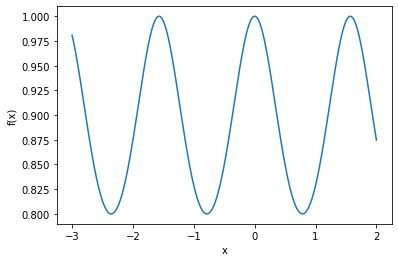

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
  return x*np.exp(x)
def f(x):
  return 1/(1+np.sin(x)**2*np.cos(x)**2)

x_int = np.linspace(-3,2,1000)
plt.plot(x_int, f(x_int))
plt.xlabel('x')
plt.ylabel('f(x)')

Visibly, $f(x)$ has $3$ local minima between $-3$ and $2$. This minima are localized at $x_0 = -\frac{3}{4}\pi$, $x_1 = -\frac{\pi}{4}$ and $x_2 = \frac{\pi}{4}$.

Let's now visulize the integrand for different values of $\lambda$, both small and large, and develop analytical expressions for the integral $I(\lambda)$.

**Small $\lambda$:**

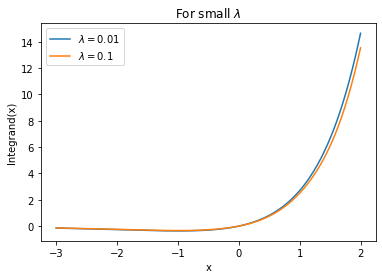

In [ ]:
def integrand(x,l):
  return g(x)*np.exp(-l*f(x))

[plt.plot(x_int,integrand(x_int, lmbd),label='$\lambda=$'+str(lmbd)) for lmbd in [0.01,0.1]]

plt.title(r'For small $\lambda$')
plt.xlabel('x')
plt.ylabel('Integrand(x)')
plt.legend(loc='best')



We can observe that the maximum of $e^{-\lambda f(x)}$ occurs at $x = 2$. Let's now Taylor expand the above-written exponential around $2$

$$ I(x) = \int_{-3}^{2}g(x)\left[ e^{-f(2)\lambda}-\lambda f'(2)(x-2)e^{-f(2)\lambda} + \lambda^2 f''(2)(x-2)^2 e^{-f(2)\lambda}+ ...\right] $$

It's easily observable that, for small $\lambda$, all the terms with a $\lambda$ factor in front of themselves become negligible. Therefore:

$$\begin{aligned} 
I(x) &= e^{-f(2)\lambda}\int_{-3}^{2}g(x) dx\\
&= e^{-f(2)\lambda}\int_{-3}^{2}xe^x dx\\
&= e^{-f(2)\lambda}\left[ xe^x\Bigl|_{-3}^{2} - \int_{-3}^{2}e^x dx \right]\\
&= e^{-f(2)\lambda}\left[ xe^x\Bigl|_{-3}^{2} - e^x\Bigl|_{-3}^{2} \right] \\
&= exp{\left(-\lambda\left( \frac{1}{1+\sin^2(2)\cos^2(2)} \right)\right)}\left[ 2e^2+3e^{-3}-e^2+e^{-3} \right] \\
&= exp{\left(-\lambda\left( \frac{1}{1+\sin^2(2)\cos^2(2)} \right)\right)}\left[ e^2+4e^{-3} \right]
\end{aligned}$$

which is the analytical formulation of the integral for small $\lambda$.

**Large $\lambda$**

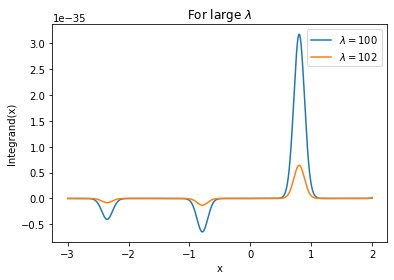

In [ ]:
[plt.plot(x_int,integrand(x_int, lmbd),label='$\lambda=$'+str(lmbd)) for lmbd in [100,102]]

plt.title(r'For large $\lambda$')
plt.xlabel('x')
plt.ylabel('Integrand(x)')
plt.legend(loc='best')

Now, let's calculate the height for each minimum, $x = x_0$, $x = x_1$ and $x = x_2$, as follows:
$$\text{Height 0} = g(x_0) \exp(-\lambda f(x_0)) = -\frac{3}{4}\pi\exp\left( -\frac{3}{4}\pi \right)\cdot\exp\left( -\frac{4}{5}\lambda \right)$$
$$\text{Height 1} = g(x_1) \exp(-\lambda f(x_1)) = -\frac{\pi}{4}\exp\left( -\frac{\pi}{4} \right)\cdot\exp\left( -\frac{4}{5}\lambda \right)$$
$$\text{Height 2} = g(x_2) \exp(-\lambda f(x_2)) = \frac{\pi}{4}\exp\left( \frac{\pi}{4} \right)\cdot\exp\left( -\frac{4}{5}\lambda \right)$$

The width can be wriiten as follows:
$$\text{Width 0} = \sqrt{\frac{2}{f''(x_0)\lambda}}$$
$$\text{Width 1} = \sqrt{\frac{2}{f''(x_1)\lambda}}$$
$$\text{Width 2} = \sqrt{\frac{2}{f''(x_2)\lambda}}$$

The next step is to find the width and the step after consists of approximating the integral.

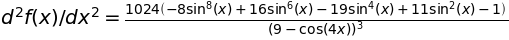

In [ ]:
minima = np.array([-3*np.pi/4, -np.pi/4, np.pi/4])
x, lmbd, height, ddf = symbols('x \lambda Height {d^2f(x)}/{dx^2}',real=True)
g_x = x*exp(x)
f_x = 1/(1+sin(x)**2*cos(x)**2)
diff_diff_f = simplify(diff(diff((f_x),x),x))
Eq(ddf, diff_diff_f)

We have:
$$f''(x_0) = f''(x_1) = f''(x_2)  = \frac{32}{25} $$

Therefore:

$$ \text{Width 0} = \text{Width 1} = \text{Width 2} = \frac{5}{4\sqrt{\lambda}}$$

At this point, the analytical formulation of the integral can be written as:

$$I(\lambda) = \exp\left( -\frac{4}{5}\lambda \right)\cdot \frac{5}{4\sqrt{\lambda}}\left[ -\frac{3}{4}\pi\exp\left( -\frac{3}{4}\pi \right) - \frac{\pi}{4}\pi\exp\left( -\frac{\pi}{4} \right) +\frac{\pi}{4}\exp\left( \frac{\pi}{4} \right) \right]$$

### Answer to Question $b$

**Small $\lambda$**

Let's compare the plots of the numerical and the analytical solutions.

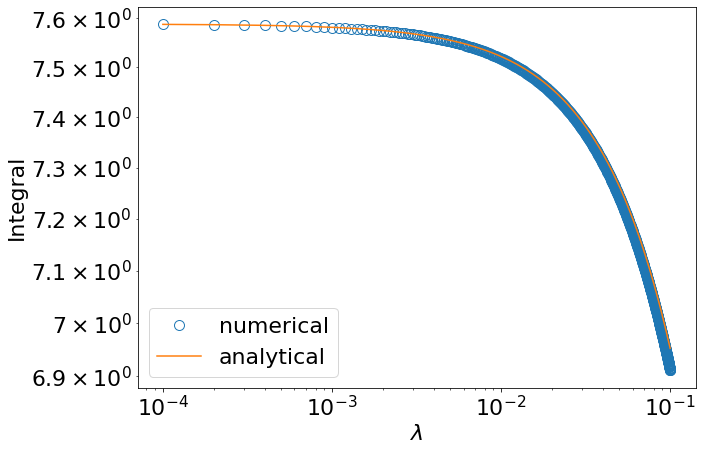

In [ ]:
lam_list_small=np.linspace(0.0001,0.1,1000)
analytical_small = np.exp(-lam_list_small*f(2))*(np.exp(2)+4*np.exp(-3))
numerical_small = [integrate.quad(lambda x: g(x)*np.exp(-eps*f(x)), -3, 2)[0] for eps in lam_list_small]
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,7))
plt.loglog(lam_list_small,numerical_small,'o',mfc='none',markersize=10,label='numerical')
plt.loglog(lam_list_small,analytical_small,label='analytical')
plt.xlabel('$\lambda$')
plt.ylabel('Integral')
plt.legend(loc='best');

We can observe a perfect accordance between the numerical and the analytical approximation.

**Large $\lambda$**

Let's compare the plots of the numerical and the analytical solutions.

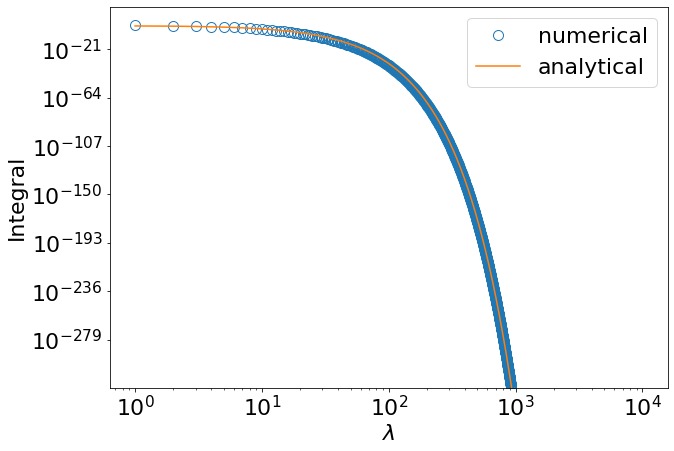

In [ ]:
lam_list=np.linspace(1,1e4,10000)
analytical = (exp(np.pi/4)*np.pi/4 + exp(-3*np.pi/4)*(-3)*np.pi/4 + exp(-np.pi/4)*(-1)*np.pi/4)*np.exp(-lam_list*4/5)*((5/4)*np.sqrt(lam_list))
numerical = [integrate.quad(lambda x: g(x)*np.exp(-eps*f(x)), -3, 2)[0] for eps in lam_list]
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,7))
plt.loglog(lam_list,numerical,'o',mfc='none',markersize=10,label='numerical')
plt.loglog(lam_list,analytical,label='analytical')
plt.xlabel('$\lambda$')
plt.ylabel('Integral')
plt.legend(loc='best');


We can observe a perfect accordance between the numerical and the analytical approximation.

## Problem $2$

$$I(x) = \int_{x}^{\infty}t^3e^{-4t^5}dt$$

### Answer to Question $1$

The integral $I(x)$ can be rewritten as:

$$ I(x) = \int_{0}^{\infty}t^3e^{-4t^5}dt - \int_{0}^{x}t^3e^{-4t^5}dt $$

The first integral can be analytically solved.

Concerning the second integral, let's start from the Taylor series $e^x = \sum_{n=0}^\infty \frac{x^n}{n!}$. We can now plug in it $x = -4t^5$ and multiply the series by $t^3$:

$$t^3 e^{-4t^5} =  \sum_{n=0}^\infty \frac{(-4)^n}{n!}t^{5n+3}$$

We can now integrate the series:

$$\begin{aligned}
I(x) &= \int_{0}^{x}\sum_{n=0}^\infty \frac{(-4)^n}{n!}t^{5n+3}dt\\
&=\sum_{n=0}^\infty \frac{(-4)^n}{n!}\int_{0}^{x}t^{5n+3}dt\\
&=\sum_{n=0}^\infty \frac{(-4)^n}{n!}\cdot \frac{x^{5n+4}}{5n+4}
\end{aligned}$$

To check for convergence we use the ratio test:

$$\begin{aligned}
\rho &= \lim_{n \to \infty} \left|\frac{\frac{(-4)^{(n+1)}}{(n+1)!}\cdot \frac{x^{5(n+1)+4}}{5(n+1)+4}}{\frac{(-4)^{n}}{n!}\cdot \frac{x^{5n+4}}{5n+4}}\right|\\
&= \lim_{n \to \infty} \left|\frac{(-4)^{(n+1)}x^{5n+9}(5n+4)}{(-4)^n(n+1)x^{5n+4}(5n+9)}\right|\\
&= 0 <1
\end{aligned}$$

The convergence of the power series has been proven.

In conclusion:

$$I(x) = \frac{\Gamma(4/5)}{10\cdot2^{3/5}} +\sum_{n=0}^\infty \frac{(-4)^n}{n!}\cdot \frac{x^{5n+4}}{5n+4}$$

where $\Gamma$ represents the Gamma function.

### Answer to Question $2$

In order to determine the asymptotic series, we need to develop our integral by using integration by parts.

First of all, let's rewrite $e^{-4t^5}$:

$$ e^{-4t^5} = -\frac{1}{20t^4} \frac{d(e^{-4t^5})}{dt}$$

$$\begin{aligned}
I(x) &= \int_{x}^{\infty}t^3e^{-4t^5}dt\\
&= \int_{x}^{\infty}t^3\cdot\left[ -\frac{1}{20t^4} \frac{d(e^{-4t^5})}{dt} \right]dt\\
&= \int_{x}^{\infty}-\frac{1}{20t}\frac{d(e^{-4t^5})}{dt}dt\\
&= -\frac{1}{20t}e^{-4t^5}\Bigl|_{x}^{\infty}-\int_{x}^{\infty}\frac{1}{20t^2}e^{-4t^5}dt\\
&= \frac{1}{20x}e^{-4x^5}+\int_{x}^{\infty}\frac{1}{20^2t^6}\frac{d(e^{-4t^5})}{dt}dt\\
&= \frac{1}{20x}e^{-4x^5}+\frac{1}{20^2t^6}e^{-4t^5}\Bigl|_{x}^{\infty}-\int_{x}^{\infty}-\frac{6}{20^2t^7}e^{-4t^5}dt\\
&= \frac{1}{20x}e^{-4x^5}-\frac{1}{20^2x^6}e^{-4x^5}+\int_{x}^{\infty}\frac{6}{20^2t^7}e^{-4t^5}dt \\
&= \frac{1}{20x}e^{-4x^5}-\frac{1}{20^2x^6}e^{-4x^5}+\frac{6}{20^3x^{11}}e^{-4x^5} + \lim_{K \to \infty}\left(\sum_{N = 3}^{K}(-1)^N\frac{1\cdot6\cdot\cdot\cdot[5(N-1)+1]}{20^{N+1}x^{5N+1}}e^{-4x^5}\right) + \epsilon_N(x)
\end{aligned}$$

where:

$$  \epsilon_N(x)= \int_{x}^{\infty} (-1)^{N+1}\frac{1\cdot6\cdot\cdot\cdot[5(N-1)+1]}{20^{N+1}x^{5N+1}}e^{-4x^5} $$

The error, visibly, goes to zero as $x \rightarrow \infty$. The series, as shown below, approximates the integral for large $x$, therefore it is an asymptotic series.

### Answer to Question $3$

**Covergent series:**

In [ ]:
x=0.001
series_conv = [0.0768105+np.sum(np.array([((-4)**n)*x**(5*n+4)/(special.factorial(n)*(5*n+4))for n in range(n_i)]))for n_i in range(1,20)]
integ = integrate.quad(lambda t: t**3*np.exp(-4*t**5), x, np.inf)[0]

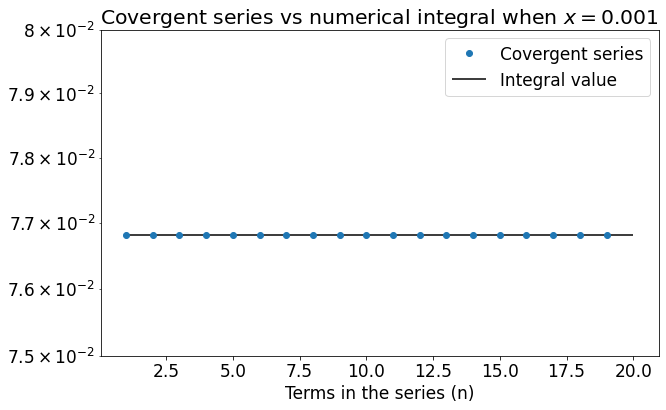

In [ ]:
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(10,6))
plt.plot(range(1,20),series_conv,'o',label='Covergent series')
plt.hlines(integ,1,20,label='Integral value')
plt.yscale('log')
plt.xlabel('Terms in the series (n)')
plt.ylim([7.5*10**(-2), 8*10**(-2)])
plt.legend(loc='best')
plt.title('Covergent series vs numerical integral when $x=$'+str(x));

The plot show how well the convergent series approximates the integral for small $x$.

**Asymptotic series:**

In [ ]:
x_asym=np.linspace(1,100,10000)
series_asym = 1/(20*x_asym*np.exp(4*x_asym**5))-1/(20**2*x_asym**6*np.exp(4*x_asym**5))
integ = np.array([integrate.quad(lambda t: t**3*np.exp(-4*t**5), x_a, np.inf)[0] for x_a in x_asym])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


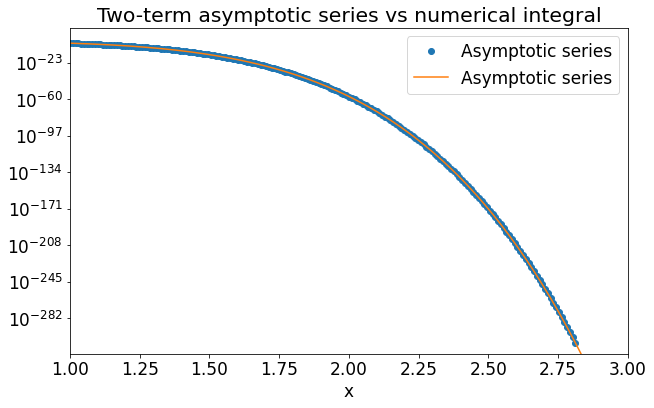

In [ ]:
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(10,6))
plt.plot(x_asym,series_asym,'o',label='Asymptotic series')
plt.plot(x_asym,integ,label='Asymptotic series')
plt.yscale('log')
plt.xlabel('x')
plt.xlim([1, 3])
plt.legend(loc='best')
plt.title('Two-term asymptotic series vs numerical integral');

### Answer to Question $4$

Let's assume $x \rightarrow 0$.

In [ ]:
def integrand(t):
  return t**3*np.exp(-4*t**5)

In [ ]:
x_int = np.linspace(0.001, 100, 100000)

No handles with labels found to put in legend.


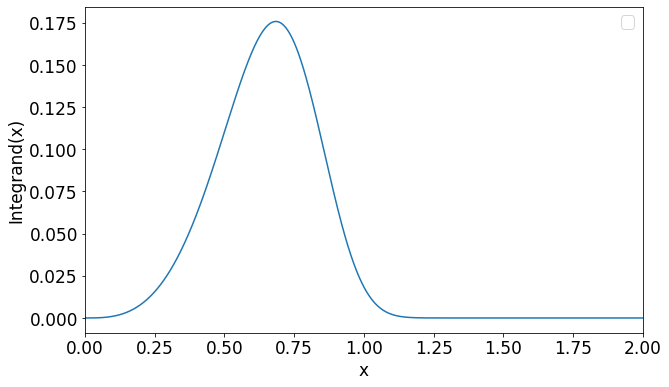

In [ ]:
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(10,6))
plt.plot(x_int,integrand(x_int))
plt.xlabel('x')
plt.ylabel('Integrand(x)')
plt.xlim([0, 2])
plt.legend(loc='best')

The next step is to find the height $f_{max}$ with the corresponding $x_{max}$ as well as the width $w$. In order to do so, we need to calculate the derivative of the integrand and let it be zero.

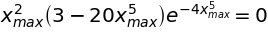

In [ ]:
x = symbols('x_{max}',real=True)
Eq(simplify(diff(x**3*exp(-4*x**5),x)),0)

We can throw away $x_{max}^2$ term since from the figure we see $x_{max}$ cannot be evaluated to zero. So we're going to evaluate
$$3-20x_{max}^5=0$$

Therefore:
$$x_{max} = \left( \frac{3}{20} \right)^{1/5} $$ 

which implies:

$$f_{max} = \text{Height} =  \left( \frac{3}{20} \right)^{3/5}e^{-3/5} $$

The width can be calculated as:

$$\text{Width} = \sqrt{\frac{2}{g''(x_{max})\lambda}}$$

where:

$$\lambda = 4, \quad g(x) = x^5$$

$$g''(x_{max}) = 20x_{max}^3$$

Therefore:

$$ \text{Width} = \sqrt{\frac{2}{4\cdot20\left(\frac{3}{20}\right)^{3/5}}} $$

In [ ]:
int = (3/20)**(1/5)*np.exp(-3/5)*np.sqrt(2/(80*(3/20)**(3/5)))
int

In conclusion:
$$I = \text{Height}\cdot\text{Width} \approx 0.105 $$

## Problem $3$

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
from scipy.optimize import brentq
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

### Answer to Question $a$

$$\int_0^{2\pi}\frac{d\theta}{5-3sin\theta}$$

In order to find an analytic continuation of the integrand, we perform a change of variable by using an exponential:

$$z = e^{i\theta}$$
$$dz=ie^{i\theta}d\theta$$
$$d\theta=\frac{dz}{iz}$$
**************************
$$sin\theta =\frac{e^{i\theta}-e^{-i\theta}}{2i}$$
$$sin\theta =\frac{z-z^{-1}}{2i}$$
**************************

We can now substitute these into the original equation:
$$\oint \frac{dz}{iz(5-3(\frac{z-z^{-1}}{2i}))}$$
Simplifying:
$$\oint \frac{2}{-3z^2+10iz+3}dz$$
which can be rewritten as:
$$-\frac{2}{3}\oint \frac{dz}{z^2-\frac{10}{3}iz-1}$$

<br>We now find residues. To find the residue, we can look at the poles of the equation.

The numerator has no poles, thus the roots of the demoniator are the only poles.

Solve $z^2-\frac{10}{3}iz-1 = 0$
$$z = \frac{\frac{10}{3}i\pm\sqrt{-\frac{100}{9}+4}}{2}$$
<br>$$z = \frac{5}{3}i \pm \frac{4}{3}i$$
which implies:
$$z_1 = \frac{i}{3} \lor z_2 = 3i $$

From this we deduce two total poles. However since our contour integral spans $\theta=0 \rightarrow 2\pi$ the contour carves out a unit cirle.

Thus only one of the roots is within the region.

$$z_1 = \frac{i}{3}$$

<br>We now apply the residue theorem:

$$\begin{aligned}Res(f,z_1) &= \lim_{z \to z_1}f(z_1)(z - z_1)\\
&=-\frac{2}{3}\cdot\frac{1}{z_1-z_2}\\
&=-\frac{2}{3}\cdot\frac{1}{-\frac{8}{3}i}\\
&=-\frac{i}{4}
\end{aligned}$$
**************************
$$\begin{aligned}\int_0^{2\pi}\frac{d\theta}{5-3sin\theta} = -\frac{2}{3}\oint \frac{dz}{z^2-\frac{10}{3}iz-1}&=2\pi i\sum Res(f(z^{*}),z^{*})\\
&=2\pi i \cdot \left(-\frac{i}{4}\right)\\
&= \frac{\pi}{2}\\
\end{aligned}$$

Let's double check our result:

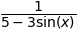

In [ ]:
x = symbols('x')
expression1= 1/(5-3*sin(x))
expression1

In [ ]:
ans1 = integrate(expression1,(x, 0, 2*pi))
ans1

In [ ]:
pi/2

We can state our result is correct.

###Answer to Question $b$

$$\int_{-\infty}^{\infty}\frac{dx}{(x^2+1)(x^2+4)}$$

Since we have an integration along the whole real axis, we are using a semi-circle contour having an infinite radius.

Let's try a basic substitution of $z$ and construct an analytical continuation of our original function:
$$\lim_{R \to \infty}\oint_c \frac{dz}{(z^2+1)(z^2+4)}$$

This integral can be written as a sum of integrals, on two sub-parts of the total contour $c$:

$$\lim_{R \to \infty}\oint_c \frac{dz}{(z^2+1)(z^2+4)}=\lim_{R \to \infty}\left(\int_{-R}^{R} \frac{dz}{(z^2+1)(z^2+4)}+\oint_{c_2}\frac{dz}{(z^2+1)(z^2+4)}\right)$$

Below a graphical representation of the contour is reported:




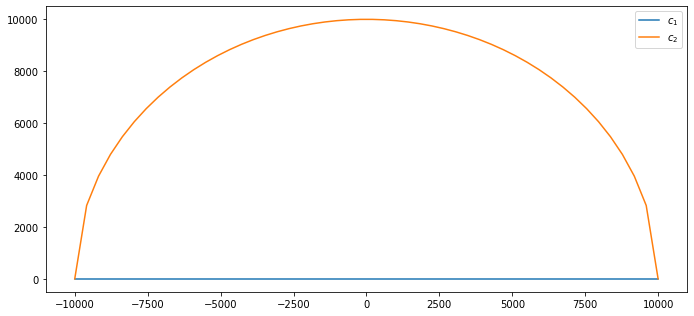

In [ ]:
rng = 10000
plt.figure(figsize=(11.5,5.25))
plt.plot([-rng,rng],[0,0],label='$c_1$')
x=np.linspace(-rng,rng)
plt.plot(x,np.sqrt(rng**2-x**2),label='$c_2$')
plt.legend(loc='best')
plt.show()

<br>Let's now take a closer look at the second term of the RHS and let's apply to it the *ML inequality* to determine an upper bound for it:

The length of the contour is half of the perimeter of the circle with radius $R$: $$l=\pi R$$

Solving for the maximum we can leverage the triangle inequality.<br>
$$|(|R|^2-|1|)(|R|^2-|4|)|\leq|(R^2+1)(R^2+4)|\leq(|R|^2+|1|)(|R|^2+|4|)$$
So,
$$|(|R|^2-|1|)(|R|^2-|4|)|\leq|(z^2+1)(z^2+4)|\leq(|R|^2+|1|)(|R|^2+|4|)$$

Since we have been studying the demoninator, the smallest of this inequality will provide the highest bound:
$$\left|\frac{1}{(z^2+1)(z^2+4)}\right|\leq\left|\frac{1}{(z^2-1)(z^2-4)}\right|$$

Combining everything we get:
$$0\leq\left|\oint_{c2}f(z)dz\right|\leq\frac{\pi R}{(R^2-1)(R^2-4)}$$
As $R$ approaches infinity this upperbound approaches $0$. Thus the contour integral over the $2^{nd}$ path is bounded to be $0$.

To find the residue, we can calculate the poles of the function, as we did before:
$$(z^2+1)(z^2+4) = 0$$
which implies:
$$ z_{1,2} = \pm i \lor z_{3,4} = \pm 2i$$

The only residues eclosed by the contour we chose, a positive semi-circle, are:
$$ z_1 = i \land z_3 = 2i$$ 
We can now solve the integral by using the residue theorem:
$$\begin{aligned}
Res(f,z_1) &= \lim_{z \to z_1}f(z_1)(z - z_1)\\
&=\frac{1}{(z_1-z_2)(z_1-z_3)(z_1-z_4)}\\
&=\frac{1}{(2i)(-i)(3i)}\\
&=\frac{1}{6i}
\end{aligned}$$
**************************
$$\begin{aligned}
Res(f,z_3) &= \lim_{z \to z_3}f(z_3)(z - z_3)\\
&=\frac{1}{(z_3-z_1)(z_3-z_2)(z_3-z_4)}\\
&=\frac{1}{(2i)(-i)(18i)}\\
&=-\frac{1}{12i}
\end{aligned}$$

In [ ]:
1/(6*I)-1/(12*I)

$$\begin{aligned}
\int_{-\infty}^{\infty}\frac{dx}{(x^2+1)(x^2+4)} &=2\pi i\sum Res(f(z^{*}),z^{*})\\
&=2\pi i \cdot \left(-\frac{i}{12}\right)\\
&= \frac{\pi}{6}
\end{aligned}$$

Let's double-check our result:

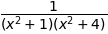

In [ ]:
x = symbols('x')
expression2= 1/((x**2+1)*(x**2+4))
expression2

In [ ]:
ans2 = integrate(expression2,(x, -oo, oo))
ans2

We can state our result is correct.

### Answer to Question $c$

$$\int_{0}^{\infty}\frac{x^{1/3}}{(1+x^2)}dx$$


Let's try a basic substitution of $z$ and construct an analytical continuation of our original function:
$$\lim_{R \to \infty}\oint_c \frac{z^{1/3}}{(1+z^2)}dz$$

It's important to notice that $z^{1/3} = e^{\frac{1}{3}ln(z)}$

The following contour can be chosen:

In [ ]:
from google.colab import files
import cv2

In [ ]:
uploaded = files.upload()

Saving Keyhole_contour.jpg to Keyhole_contour.jpg


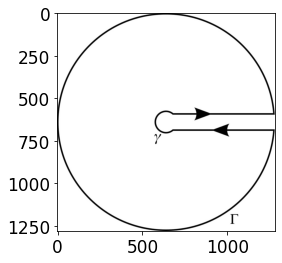

In [ ]:
img = cv2.imread('Keyhole_contour.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

$$\oint_{c} = \int_{\epsilon}^{R}+\int_{\Gamma}+\int_{R}^{\epsilon}+\int_{\gamma}$$

Let's take a closer look at the RHS.

Concerning the second integral, let's operate the following substitution:

$$z = Re^{i\theta}$$
which implies:
$$dz = Rie^{i\theta}$$

The integral becomes:
$$\lim_{R \to \infty}\int_{0}^{2\pi}\frac{R^{4/3}ie^{4i\theta/3}}{1+R^2e^{2i\theta}}d\theta = 0$$

<br>Similarly, for the fourth integral, we can proceed as follows:

$$z = \epsilon e^{i\theta}$$
which implies:
$$dz = \epsilon ie^{i\theta}$$

The integral becomes:
$$\lim_{\epsilon \to 0}\int_{2\pi}^{0}\frac{\epsilon^{4/3}ie^{4i\theta/3}}{1+\epsilon^2e^{2i\theta}}d\theta = 0$$

<br> Let's now take into consideration the third integral:
$$\begin{aligned}
\int_{R}^{\epsilon}\frac{z^{1/3}}{(1+z^2)}dz &= \int_{R}^{\epsilon}\frac{e^{\frac{1}{3}ln(z)}}{(1+z^2)}dz\\
&= \int_{R}^{\epsilon}\frac{e^{\frac{1}{3}ln(|z|\cdot e^{i \cdot arg(z)})}}{(1+z^2)}dz\\
&= \int_{R}^{\epsilon}\frac{e^{\frac{1}{3}\left(ln(|z|)+i\cdot arg(z)\right)}}{(1+z^2)}dz\\
&= \int_{R}^{\epsilon}\frac{e^{\frac{1}{3}\left(ln(|z|)+2\pi i\right)}}{(1+z^2)}dz\\
&= \int_{R}^{\epsilon}\frac{z^{1/3}e^{2\pi i/3}}{(1+z^2)}dz\\
&= -\int_{\epsilon}^{R}\frac{z^{1/3}e^{2\pi i/3}}{(1+z^2)}dz\\
\end{aligned}$$

Therefore:
$$\lim_{R \to \infty}\oint_c \frac{z^{1/3}}{(1+z^2)}dz = \left( 1-e^{2\pi i/3} \right)\lim_{R \to \infty}\left(\lim_{\epsilon \to 0}\int_{\epsilon}^{R}\frac{z^{1/3}}{(1+z^2)}dz\right)$$

To find the residue, we can calculate the poles of the function, as we did before:
$$(z^2+1) = 0$$
which implies:
$$ z_{1,2} = \pm i $$

The only residues eclosed by the contour we chose, a positive semi-circle, are:
$$ z_1 = i $$ 
We can now solve the integral by using the residue theorem:
$$\begin{aligned}
Res(f,z_1) &= \lim_{z \to z_1}f(z_1)(z - z_1)\\
&=\frac{z_1^{1/3}}{(z_1-z_2)}\\
&=\frac{i^{1/3}}{2i}\\
&= \frac{e^{i\pi/2}}{2i}
\end{aligned}$$
***************************
$$\begin{aligned}
Res(f,z_2) &= \lim_{z \to z_2}f(z_2)(z - z_2)\\
&=\frac{z_2^{1/3}}{(z_2-z_1)}\\
&=\frac{(-i)^{1/3}}{-2i}\\
&= \frac{e^{3\pi i/2}}{-2i}
\end{aligned}$$

$$\begin{aligned}
\int_{0}^{\infty}\frac{x^{1/3}}{(1+x^2)}dx&=(1-e^{2\pi i/3})^{-1}\cdot 2\pi i\sum Res(f(z^{*}),z^{*})\\
&=(e^{0\cdot i}-e^{2\pi i/3})^{-1}\left[2\pi i \cdot \left(\frac{e^{i\pi/2}}{2i}\right)+2\pi i \cdot \left(\frac{e^{3\pi i/2}}{-2i}\right)\right]\\
&= -\frac{2i}{e^{\pi i/3}(e^{\pi i/3}-e^{-\pi i/3})}\left[-e^{\pi i/3}\left(\frac{e^{\pi i/6}-e^{-\pi i/6}}{2i}\right)\right]\pi\\
&= \frac{2i}{e^{\pi i/3}-e^{-\pi i/3}}\left[\frac{e^{\pi i/6}-e^{-\pi i/6}}{2i}\right]\pi
\end{aligned}$$

We know that:

$$ \frac{e^{\pi i/3}-e^{-\pi i/3}}{2i} = \sin{\left( \frac{\pi}{3} \right)} $$

and

$$ \frac{e^{\pi i/6}-e^{-\pi i/6}}{2i} = \sin{\left( \frac{\pi}{6} \right)} $$

Therefore:

$$\begin{aligned}
\int_{0}^{\infty}\frac{x^{1/3}}{(1+x^2)}dx&= \frac{\sin{\left( \frac{\pi}{6} \right)}}{\sin{\left( \frac{\pi}{3} \right)}}\pi \\
&= \frac{\frac{1}{2}}{\frac{\sqrt{3}}{2}}\pi\\
&= \frac{\pi}{\sqrt{3}}
\end{aligned}$$


Let's double-check our result:

In [ ]:
np.pi/np.sqrt(3)

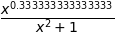

In [ ]:
x = symbols('x')
expression3= x**(1/3)/(x**2+1)
expression3

In [ ]:
ans3 = integrate(expression2,(x, 0, oo))
ans3

We can state our result is correct.